# CSCN8010-23S-SEC1- FOUNDATIONS OF MACHINE LEARNING

## Group-15
### owner: SABIHA MOHAMAD

## Movie  Recommendation System

<img src=".\image.png" alt="Image Description">


# Content Based Filtering
Now lets make a recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [2]:
# import libraries 
import pandas as pd
import numpy as np

### Data collection

In [3]:
#https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset
data = pd.read_csv('imdb_movies.csv')
data.head(10)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
5,Cocaine Bear,02/23/2023,66.0,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of ...","Keri Russell, Sari, Alden Ehrenreich, Eddie, O...",Cocaine Bear,Released,English,35000000.0,8.000000e+07,AU
6,John Wick: Chapter 4,03/23/2023,80.0,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000.0,3.513494e+08,AU
7,Puss in Boots: The Last Wish,12/26/2022,83.0,"Animation, Family, Fantasy, Adventure, Comedy",Puss in Boots discovers that his passion for a...,"Antonio Banderas, Puss in Boots (voice), Salma...",Puss in Boots: The Last Wish,Released,English,90000000.0,4.834806e+08,AU
8,Attack on Titan,09/30/2022,59.0,"Action, Science Fiction","As viable water is depleted on Earth, a missio...","Paul Bianchi, Computer (voice), Erin Coker, Al...",Attack on Titan,Released,English,71000000.0,2.549465e+08,US
9,The Park,03/02/2023,58.0,"Action, Drama, Horror, Science Fiction, Thriller",A dystopian coming-of-age movie focused on thr...,"Chloe Guidry, Ines, Nhedrick Jabier, Bui, Carm...",The Park,Released,English,119200000.0,4.889625e+08,US


### Data Preprocessing

In [4]:
print(data.dtypes)

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
dtype: object


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [6]:
#checking null values
data.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [7]:
#drop the null value
data.dropna(inplace=True)

In [8]:
#shape of the data
print("data:",data.shape)


data: (10052, 12)


In [9]:
# Check for duplicate rows
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10173    False
10174    False
10175    False
10176    False
10177    False
Length: 10052, dtype: bool

---  Removing unwanted columns like status and orig_title

In [10]:
new_data = data.drop(columns=['status', 'orig_title'])
new_data.head()

,names,date_x,score,genre,overview,crew,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...","Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",English,77000000.0,3.409420e+08,US


--- Renaming column for better understanding

In [11]:
new_column_names = {
    "names": "movie_title",
    "score": "IMDB_score",
    "orig_lang":"language",
    "budget_x":"budget",
    "date_x":"Date"
    # ... add more columns as needed
}

# Rename the columns using the rename() function
new_data.rename(columns=new_column_names, inplace=True)

# Print the DataFrame to verify the changes
new_data

,movie_title,Date,IMDB_score,genre,overview,crew,language,budget,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...","Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",English,116000000.0,4.756613e+08,US


--- performing descriptive statistics on the  DataFrame

In [12]:
new_data.describe().T.style.format('{:,.2F}')

,count,mean,std,min,25%,50%,75%,max
IMDB_score,"10,052.00",63.83,12.78,0.00,59.00,65.00,71.00,100.00
budget,"10,052.00","64,125,276.59","56,658,516.67",1.00,"14,397,627.25","50,000,000.00","104,000,000.00","460,000,000.00"
revenue,"10,052.00","251,204,924.10","276,549,495.18",0.00,"27,687,812.00","149,328,803.80","416,157,754.65","2,923,706,026.00"


### <i> comment : This calculates summary statistics for the numerical columns in the DataFrame, making it easier to interpret the data.

In [13]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10052 entries, 0 to 10177
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_title  10052 non-null  object 
 1   Date         10052 non-null  object 
 2   IMDB_score   10052 non-null  float64
 3   genre        10052 non-null  object 
 4   overview     10052 non-null  object 
 5   crew         10052 non-null  object 
 6   language     10052 non-null  object 
 7   budget       10052 non-null  float64
 8   revenue      10052 non-null  float64
 9   country      10052 non-null  object 
dtypes: float64(3), object(7)
memory usage: 863.8+ KB


<h2> Data visualization 

---- Correlation Heatmap 

In [14]:
matrix=new_data[["revenue","IMDB_score","budget"]].corr()
matrix.style.background_gradient(cmap='Reds', axis=0)

,revenue,IMDB_score,budget
revenue,1.000000,0.090929,0.682766
IMDB_score,0.090929,1.000000,-0.214374
budget,0.682766,-0.214374,1.000000


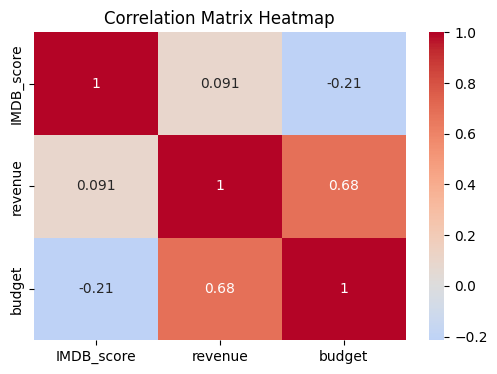

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt  # Importing pyplot from matplotlib

# Calculate the correlation matrix
corr = new_data[["IMDB_score", "revenue", "budget"]].corr()

# Create a heatmap plot
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


Result -Correlation between "revenue" and "budget" (0.6828):
This value is relatively high at around 0.68, indicating a moderate positive correlation between "revenue" and "budget." This suggests that there is a tendency for movies with higher budgets to have higher revenues.

### <i> comments - Generating a visually appealing correlation matrix where the strength of the correlation between different pairs of variables is indicated by the color intensity in each cell. Positive correlations are shown in warmer shades of red, while negative correlations would be displayed in cooler shades if present.

---Identify the ten movies that have achieved the highest revenue.

In [16]:
data = pd.DataFrame(new_data, columns=["movie_title", "revenue"])
data_sorted = new_data.sort_values(by="revenue", ascending=False)
data_sorted["revenue"] = data_sorted["revenue"] / 1000000
pd.options.display.float_format = "{:,.0f}".format
data_sorted.set_index('movie_title', inplace=True)
ranking_rev = data_sorted.head(10)
ranking_rev

,Date,IMDB_score,genre,overview,crew,language,budget,revenue,country
movie_title,,,,,,,,,
Avatar,12/17/2009,76,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",English,"237,000,000","2,924",AU
Avengers: Endgame,04/24/2019,83,"Adventure, Science Fiction, Action",After the devastating events of Avengers: Infi...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",English,"400,000,000","2,795",AU
Avatar: The Way of Water,12/15/2022,78,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",English,"460,000,000","2,317",AU
Titanic,12/18/1997,79,"Drama, Romance",101-year-old Rose DeWitt Bukater tells the sto...,"Leonardo DiCaprio, Jack Dawson, Kate Winslet, ...",English,"200,000,000","2,223",AU
Titanic,04/11/1953,66,"Drama, Romance","Unhappily married, Julia Sturges decides to go...","Clifton Webb, Richard Ward Sturges, Barbara St...",English,"200,000,000","2,223",US
Louis Tomlinson: All of Those Voices,03/22/2023,91,"Documentary, Music",Ditching the typical glossy sheen of celebrity...,"Louis Tomlinson, Self, Oliver Wright, Louis’ P...",English,"178,800,000","2,082",GB
Star Wars: The Force Awakens,12/17/2015,73,"Adventure, Action, Science Fiction, Fantasy",Thirty years after defeating the Galactic Empi...,"Harrison Ford, Han Solo, Mark Hamill, Luke Sky...",English,"245,000,000","2,068",AU
Avengers: Infinity War,04/25/2018,83,"Adventure, Action, Science Fiction",As the Avengers and their allies have continue...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",English,"300,000,000","2,048",AU
Spider-Man: No Way Home,12/16/2021,80,"Action, Adventure, Science Fiction",Peter Parker is unmasked and no longer able to...,"Tom Holland, Peter Parker / Spider-Man, Zenday...",English,"200,000,000","1,910",AU


### <i> comment : The result of this code is a DataFrame ranking_rev that displays the top 10 movies with the highest revenue, their movie titles, and the revenue in millions (converted from the original values). The display format is adjusted to show revenue values without decimal places and with comma separators for thousands.

---- Top 10 movies by revenue, USD million

Text(0.5, 36.72222222222221, 'Revenue, USD million')

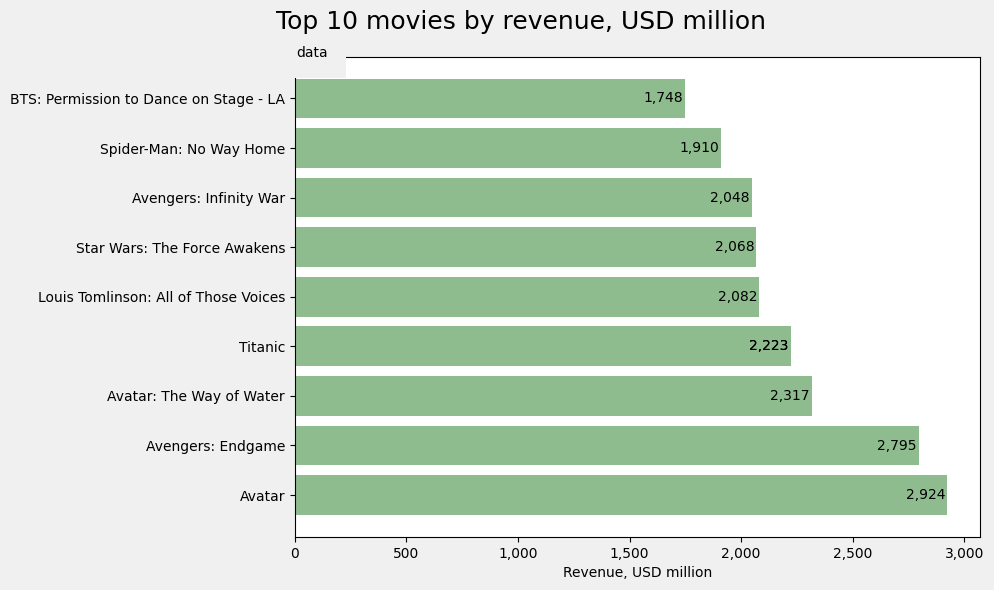

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl

index = ranking_rev.index
values = ranking_rev["revenue"]
plot_title = "Top 10 movies by revenue, USD million"
x_label = "Revenue, USD million"

fig, ax = plt.subplots(figsize=(10, 6), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()

bar = ax.barh(index, values, color='darkseagreen')
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

title = plt.title(plot_title, pad=20, fontsize=18)
title.set_position([.33, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

for rect in ax.patches:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = -30 if x_value >= 0 else 30
    ha = 'left' if x_value >= 0 else 'right'
    label = '{:,.0f}'.format(x_value)
    plt.annotate(label, (x_value, y_value), xytext=(space, 0), textcoords='offset points', va='center', ha=ha, color='black')

# Set subtitle
tfrom = ax.get_xaxis_transform()
ann = ax.annotate('data', xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

#Set x-label
ax.set_xlabel(x_label, color='black')

### <i> Comment: Overall, this code generates a visually appealing horizontal bar chart that displays the top 10 movies' revenue values with annotations, labels, and formatting enhancements to improve readability and aesthetics.

--- Identify top 10 languages from the dataset

In [18]:
lang_count= new_data["language"].value_counts().index.tolist()[0:9]
lang_count

[' English',
 ' Japanese',
 ' Spanish, Castilian',
 ' Korean',
 ' French',
 ' Chinese',
 ' Italian',
 ' Cantonese',
 ' German']

In [19]:
array =new_data["language"].value_counts().unique()[0:9]
array

array([7381,  675,  388,  384,  282,  144,  142,  141,   89], dtype=int64)

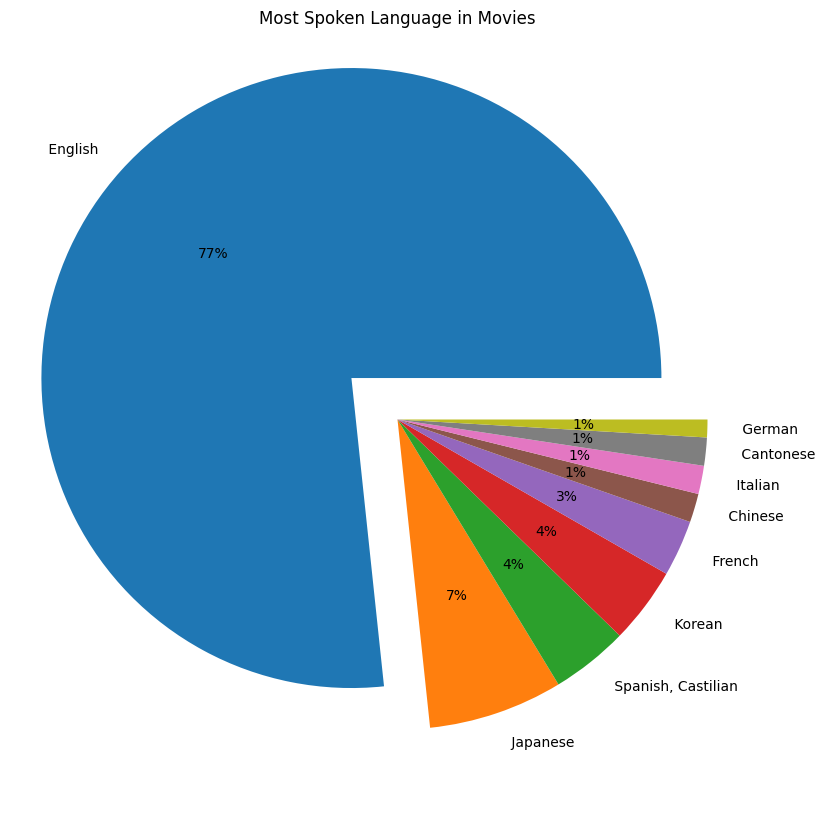

In [20]:
myexplode = [0.2, 0, 0, 0,0,0,0,0,0]
plt.figure(figsize=(10,15))
plt.title('Most Spoken Language in Movies')
plt.pie(array, labels = lang_count, explode = myexplode,autopct="%0.0f%%")
plt.show() 

### <i> Comments : pie chart showing the distribution of the top 9 most spoken languages in movies. Each slice of the pie corresponds to a language, and the percentage of movies in that language is displayed on each slice.

--- Identify most common genre

In [21]:
# now check which is the most common Genre of movies produced 

genre_count= new_data['genre'].value_counts().head(10)
genre_count

genre
Drama               556
Comedy              373
Drama, Romance      268
Horror              258
Horror, Thriller    202
Comedy, Romance     187
Documentary         131
Action, Thriller    122
Comedy, Drama       121
Romance             117
Name: count, dtype: int64

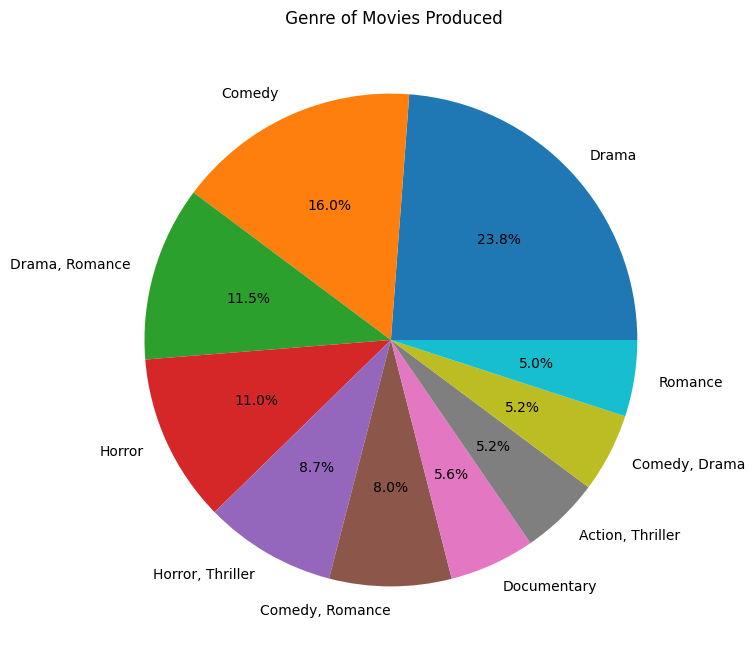

In [22]:
# plot a pie chart
myexplode = [0.2, 0, 0, 0,0,0,0,0,0]
plt.figure(figsize=(8,8))
plt.pie(genre_count, labels=genre_count.index, autopct="%0.01f%%")

plt.title(' Genre of Movies Produced')
plt.show()

### <i> Comments :  pie chart showing the distribution of movie genres based on the provided counts. Each slice of the pie corresponds to a genre, and the percentage of movies in that genre is displayed on each slice.

----- check The number of movies released per year

In [23]:
# check The number of movies released per year

# convert the date_x column from string format to date format
new_data["Date"]= pd.to_datetime(new_data["Date"])

# Get the count of movies released per year
year_counts = new_data["Date"].dt.year.value_counts().sort_index()

Text(0, 0.5, 'Counts')

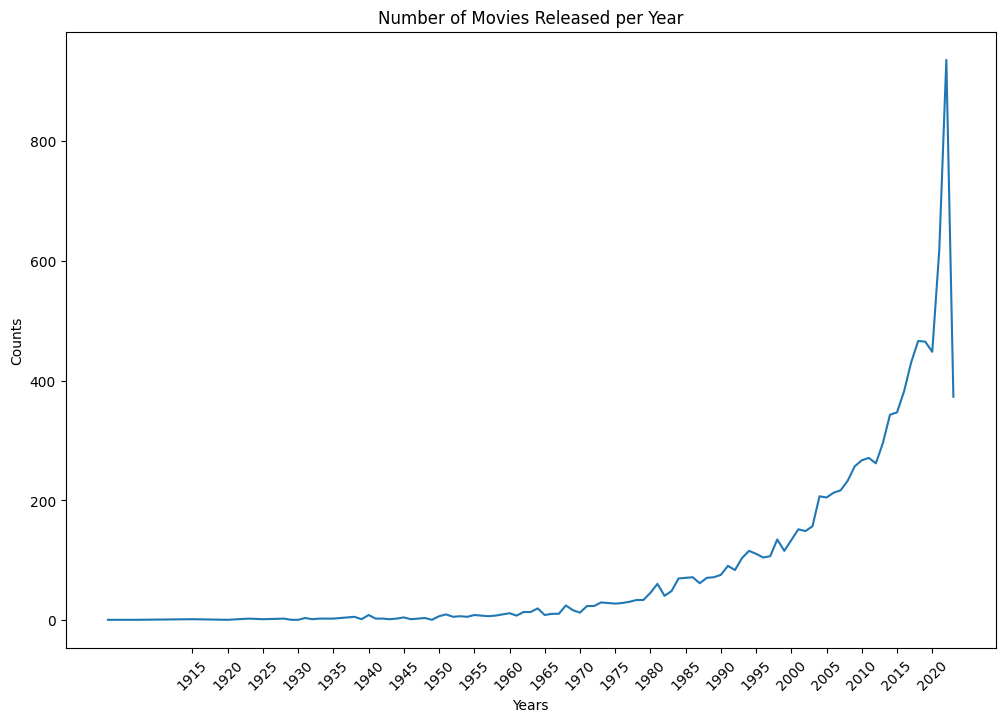

In [24]:
# Generate the plot
plt.figure(figsize=(12,8))
plt.plot(year_counts.index, year_counts)

# Set the X-axis tick labels to show bins every 10 years
xticks = [year for year in year_counts.index if year % 5 == 0]
plt.xticks(xticks, rotation=45)

# Set the title of the plot
plt.title("Number of Movies Released per Year")
plt.xlabel("Years")
plt.ylabel("Counts")

----- Total Number of Movies Released per Month from 1900 to 2023

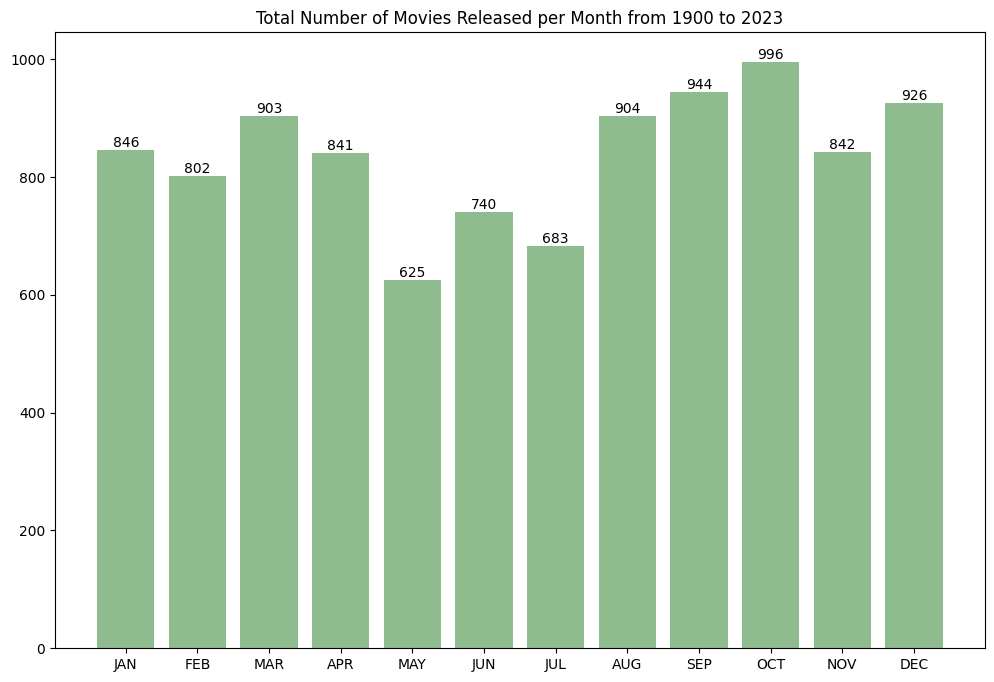

In [25]:
months=["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]
month_count = new_data["Date"].dt.month.value_counts().sort_index()
plt.figure(figsize=(12,8))
plt.bar(x=months, height= month_count, color = "darkseagreen")
plt.title("Total Number of Movies Released per Month from 1900 to 2023")
# Add values on top of each bar
for i, v in enumerate(month_count):
    plt.text(i, v, str(v), ha='center', va='bottom')

### Make a recommendations based on TfidfVectorizer with Pairwise similarity

Pairwise similarity refers to the calculation of similarity between all pairs of items in a dataset. It involves comparing each item with every other item and computing a similarity score.

In [26]:
new_data.head(1)['overview']

0    After dominating the boxing world, Adonis Cree...
Name: overview, dtype: object

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, # convert a collection of text documents into a matrix of token (word) counts.
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),# combination of 1-3 different kind of words
            stop_words = 'english')

# Filling NaNs with empty string
new_data['overview'] = new_data['overview'].fillna('')

In [28]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(new_data['overview'])# coverts into sparse matrix

### <i> Comments: now we'll have a TF-IDF matrix (tfv_matrix) that represents the 'overview' text data in a numerical format 

In [29]:
tfv_matrix

<10052x18987 sparse matrix of type '<class 'numpy.float64'>'
	with 270054 stored elements in Compressed Sparse Row format>

### <i> Comments: A sparse matrix is a type of matrix in which most of the elements are zero.
### Sparse matrices are particularly useful when dealing with large datasets that have many features or dimensions, but where most of the values are zero.
### perform computations more efficiently and save memory compared to dense matrices

In [30]:
tfv_matrix.shape

(10052, 18987)

In [31]:
from sklearn.metrics.pairwise import sigmoid_kernel# sigmoid kernel is a similarity measure to quantify the similarity between pairs of samples or data points.
# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)# apply sigmoid on vectors
sig

array([[0.76161627, 0.76159464, 0.76159428, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159464, 0.76161627, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159428, 0.76159416, 0.76161627, ..., 0.76159472, 0.76159416,
        0.76159416],
       ...,
       [0.76159416, 0.76159416, 0.76159472, ..., 0.76161627, 0.76159416,
        0.76159416],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76161627,
        0.76159462],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159462,
        0.76161627]])

#### note: you have to give same matrix to get the combination of these matrix can be done

### <i> Comments: The resulting "sig" matrix will contain similarity scores between all pairs of documents in the TF-IDF matrix. Higher values in the matrix indicate higher similarity between documents, while lower values indicate lower similarity.

### How summary 1 is related to summary 2?<br>
Then a sigmoid kernal is applied and we will get a probability between 0 to 1

In [32]:
sig[0]# this is one related record 

array([0.76161627, 0.76159464, 0.76159428, ..., 0.76159416, 0.76159416,
       0.76159416])

In [33]:
# Reverse mapping of indices and movie titles
indices = pd.Series(new_data.index, index=new_data['movie_title']).drop_duplicates()

### <i> Comments: The result is a Series called indices where you can look up the index of a movie using its title. This reverse mapping can be useful to retrieve the index of a movie for further processing or analysis.

In [34]:
indices

movie_title
Creed III                                      0
Avatar: The Way of Water                       1
The Super Mario Bros. Movie                    2
Mummies                                        3
Supercell                                      4
                                           ...  
20th Century Women                         10173
Delta Force 2: The Colombian Connection    10174
The Russia House                           10175
Darkman II: The Return of Durant           10176
The Swan Princess: A Royal Wedding         10177
Length: 10052, dtype: int64

In [35]:
indices['Dangal']

7589

In [36]:
sig[7589]# retrieve the list of similarity scores between the movie titled "supercell" and all other movies in the dataset.

array([0.76159416, 0.76159444, 0.76159448, ..., 0.76159416, 0.76159416,
       0.76159416])

In [37]:
list(enumerate(sig[indices['Supercell']])) # converting into list

[(0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7615946932063189),
 (3, 0.7615941559557649),
 (4, 0.7616162741153564),
 (5, 0.7615943739411672),
 (6, 0.7615941559557649),
 (7, 0.7615941559557649),
 (8, 0.7615942604715515),
 (9, 0.7615941559557649),
 (10, 0.7615941559557649),
 (11, 0.7615945193339473),
 (12, 0.7615941559557649),
 (13, 0.7615942482819957),
 (14, 0.7615947165628438),
 (15, 0.7615941559557649),
 (16, 0.7615941559557649),
 (17, 0.7615943398941146),
 (18, 0.7615941559557649),
 (19, 0.7615941559557649),
 (20, 0.7615941559557649),
 (21, 0.761595323616188),
 (22, 0.7615943505572632),
 (23, 0.7615942498712484),
 (24, 0.7615946355021531),
 (25, 0.761594279603412),
 (26, 0.7615941559557649),
 (27, 0.7615941559557649),
 (28, 0.7615947254100761),
 (29, 0.7615942580022748),
 (30, 0.7615948823723466),
 (31, 0.7615947883162604),
 (32, 0.7615941559557649),
 (33, 0.761594621572657),
 (34, 0.7615942708074666),
 (35, 0.7615945156509545),
 (36, 0.7615942971214112),
 (37, 0.761594

In [38]:
sorted(list(enumerate(sig[indices['Avatar']])), key=lambda x: x[1], reverse=True)# sorting in descending order based on the similarity scores.

[(68, 0.7616162741153564),
 (2236, 0.7615997911471266),
 (52, 0.7615991307003633),
 (688, 0.7615985048592004),
 (4497, 0.7615980543270606),
 (4479, 0.7615976735497135),
 (8309, 0.761597355787243),
 (8693, 0.7615971422614966),
 (5920, 0.7615969464624144),
 (5001, 0.761596726713405),
 (8844, 0.7615966538758083),
 (1496, 0.7615966241895665),
 (5338, 0.7615965840695023),
 (6370, 0.7615965629890581),
 (4679, 0.7615965073428902),
 (6367, 0.7615964379698071),
 (4932, 0.7615963884047662),
 (7763, 0.7615963323312238),
 (6521, 0.7615963241885976),
 (2163, 0.7615963227505917),
 (6809, 0.7615963078305255),
 (8, 0.7615962598283672),
 (1829, 0.7615962554463428),
 (9704, 0.7615961985942268),
 (8301, 0.7615961639370256),
 (2123, 0.7615960652744722),
 (2954, 0.7615960538211394),
 (8032, 0.76159602922622),
 (3454, 0.7615960009757505),
 (8116, 0.7615959914772511),
 (411, 0.7615959738795152),
 (5768, 0.7615959477917434),
 (3655, 0.7615959424385292),
 (8594, 0.7615959320843273),
 (4403, 0.7615959199251675)

In [39]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)# sort descending order and lamda ensures that the sorting is based on the similarity scores.

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:7]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores] #indices of the top similar movies are extracted from the sig_scores.

    
    # Get the titles of the top similar movies
    top_similar_titles = new_data['movie_title'].iloc[movie_indices]
   

    return top_similar_titles 

### <i>  Comments: This function calculates the similarity scores between the input movie and all other movies, sorts them, and returns the titles of the top 10 most similar movies. It ensures that the input movie itself is excluded from the recommendations, and the recommendations are based on descending order of similarity scores.

In [40]:
# User input for movie title
user_input_title = input("Enter the title of a movie: ")

# Call the give_rec function with user input title
recommended_movies = give_rec(user_input_title)

print("You selected:", user_input_title)
print( recommended_movies )



You selected: Batman: The Doom That Came to Gotham
3613                  Batman & Robin
9407    Batman & Mr. Freeze: SubZero
6483                Batman: Year One
4978               Batman: Bad Blood
2238           The Lego Batman Movie
1671                         Demonic
Name: movie_title, dtype: object


### Latent Semantic Analysis (LSA).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


In [ ]:
# Create a TF-IDF vectorizer
tfv = TfidfVectorizer(
    min_df=3,           # Minimum document frequency
    max_features=None,  # No limit on the maximum number of features
    stop_words='english'
)

# Create the TF-IDF matrix
tfidf_matrix = tfv.fit_transform(new_data['overview'])

In [ ]:
num_topics = 100 
lsa_model = TruncatedSVD(n_components=num_topics)
lsa_matrix = lsa_model.fit_transform(tfidf_matrix)


In [ ]:
def give_rec_lsa(title, model=lsa_model, num_recommendations=10):
    # Find the index of the selected movie title in the DataFrame
    movie_index = new_data[new_data['movie_title'] == title].index[0]
    
    # Get the LSA representation of the selected movie's vector
    movie_vector = lsa_matrix[movie_index]
    
    # Compute the similarity scores between the selected movie and all other movies using dot product
    similarity_scores = lsa_matrix.dot(movie_vector)
    
    # Sort the movie indices based on similarity scores in descending order and exclude the selected movie itself
    similar_movie_indices = np.argsort(similarity_scores)[::-1][1:num_recommendations+1]
    
    # Extract the movie titles corresponding to the similar movie indices
    similar_movie_titles = new_data['movie_title'].iloc[similar_movie_indices].tolist()
    
    return similar_movie_titles

In [ ]:
    
# User input for movie title
user_input_title = input("Enter the title of a movie: ")

# Call the give_rec_lsa function with user input title
recommended_movies_lsa = give_rec_lsa(user_input_title)

# Print recommended movies
print("You selected:", user_input_title)
print("Recommended Movies using LSA:", recommended_movies_lsa)

You selected: Batman: The Doom That Came to Gotham
Recommended Movies using LSA: ['The Nun 2', 'The Batman', 'Batman: The Long Halloween, Part One', 'Guardians of Time', 'Solo Somos Carne', 'Wonder Woman', 'Batman: The Long Halloween, Part Two', 'The Cloverfield Paradox', 'Batman Beyond: Return of the Joker', 'Goldfinger']


# Collabrative Filtering

In [ ]:
#loading libraries
import pandas as pd
import numpy as np

In [ ]:
# loading the movies dataset
movies_df = pd.read_csv('movies.csv')
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
# loading rating dataset
rating_df=pd.read_csv('ratings.csv')
rating_df


,userId,movieId,rating,timestamp
0,1,1,4,964982703
1,1,3,4,964981247
2,1,6,4,964982224
3,1,47,5,964983815
4,1,50,5,964982931
...,...,...,...,...
100831,610,166534,4,1493848402
100832,610,168248,5,1493850091
100833,610,168250,5,1494273047
100834,610,168252,5,1493846352


 Taking only 2 columns  further ( moveid and title)

In [ ]:
movies_df = pd.read_csv('movies.csv',usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})
# 'usecols' parameter specifies which columns to read from the file
movies_df

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


 Extracting year from title 

In [ ]:
import re
# Extract year from title using regular expression
def extract_year(title):
    matches = re.findall(r'\((\d{4})\)', title)
    return matches[0] if matches else None

# Add new 'year' column and remove year from 'title'
movies_df['year'] = movies_df['title'].apply(extract_year)
movies_df['title'] = movies_df['title'].apply(lambda x: re.sub(r'\s*\(\d{4}\)', '', x))

# Print DataFrame
movies_df


,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,2017
9738,193583,No Game No Life: Zero,2017
9739,193585,Flint,2017
9740,193587,Bungo Stray Dogs: Dead Apple,2018


 Taking only 3 columns further (user_id , movie_id and rating)

In [ ]:
rating_df=pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})
    # 'usecols' parameter specifies which columns to read from the file

rating_df.head(20)

,userId,movieId,rating
0,1,1,4
1,1,3,4
2,1,6,4
3,1,47,5
4,1,50,5
5,1,70,3
6,1,101,5
7,1,110,4
8,1,151,5
9,1,157,5


 Merging both the data ( rating_df + movies_df)

In [ ]:
df = pd.merge(rating_df,movies_df,on='movieId')
df

,userId,movieId,rating,title,year
0,1,1,4,Toy Story,1995
1,5,1,4,Toy Story,1995
2,7,1,4,Toy Story,1995
3,15,1,2,Toy Story,1995
4,17,1,4,Toy Story,1995
...,...,...,...,...,...
100831,610,160341,2,Bloodmoon,1997
100832,610,160527,4,Sympathy for the Underdog,1971
100833,610,160836,3,Hazard,2005
100834,610,163937,4,Blair Witch,2016


### DATA EXPLORATION 

In [ ]:
# shape of the dataset
df.shape

(100836, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int32  
 1   movieId  100836 non-null  int32  
 2   rating   100836 non-null  float32
 3   title    100836 non-null  object 
 4   year     100818 non-null  object 
dtypes: float32(1), int32(2), object(2)
memory usage: 2.7+ MB


In [ ]:
df.describe()

,userId,movieId,rating
count,"100,836","100,836","100,836"
mean,326,"19,435",4
std,183,"35,531",1
min,1,1,0
25%,177,"1,199",3
50%,325,"2,991",4
75%,477,"8,122",4
max,610,"193,609",5


In [ ]:
# checking null values
df.isnull().sum()

userId      0
movieId     0
rating      0
title       0
year       18
dtype: int64

In [ ]:
#Dropping the null values 
df.dropna(inplace=True)

In [ ]:
# Count the number of duplicated rows
duplicated_count = df.duplicated().sum()

print(f"Number of duplicated rows: {duplicated_count}")

Number of duplicated rows: 0


###  Visualization

----- Retriving movies less than 2 points 

In [ ]:
# Filter movies with ratings less than 2
low_ratings = df[df['rating'] < 2]

# Select the least 10 movies
least_10_movies = low_ratings.head(10)
print(least_10_movies)



     userId  movieId  rating                 title  year
26       76        1       0             Toy Story  1995
159     462        1       2             Toy Story  1995
235     217        3       1      Grumpier Old Men  1995
242     294        3       1      Grumpier Old Men  1995
245     308        3       0      Grumpier Old Men  1995
260     552        3       1      Grumpier Old Men  1995
265     599        3       2      Grumpier Old Men  1995
315     308        6       1                  Heat  1995
403     104       47       0  Seven (a.k.a. Se7en)  1995
475     314       47       1  Seven (a.k.a. Se7en)  1995


------ Plotting the least 10 movies

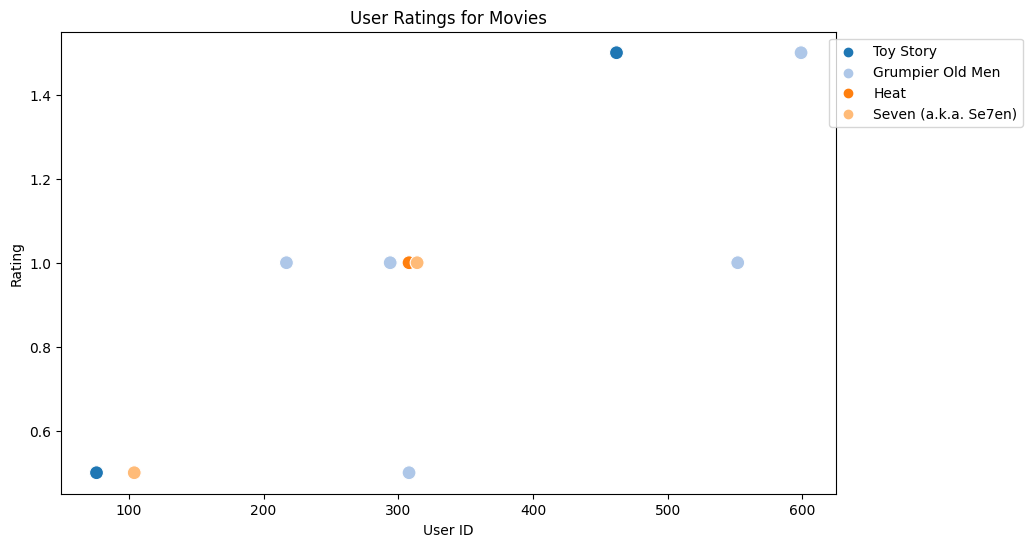

In [ ]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=least_10_movies, x='userId', y='rating', hue='title', palette='tab20', s=100)
plt.title('User Ratings for Movies')
plt.xlabel('User ID')
plt.ylabel('Rating')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


---- Getting the user id that has rated maximum time

In [ ]:
# Group the data by 'userId' and calculate the count of rated movies for each user
user_movie_count = df.groupby('userId')['movieId'].count()

# Find the user with the maximum rated movies
max_rated_user = user_movie_count.idxmax()

# Get the maximum count of rated movies
max_rated_count = user_movie_count[max_rated_user]

# Display the user ID and the maximum count of rated movies
print(f"User with the maximum number of rated movies:")
print(f"User ID: {max_rated_user}")
print(f"Number of Rated Movies: {max_rated_count}")

User with the maximum number of rated movies:
User ID: 414
Number of Rated Movies: 2697


 ------- Filtering the dataset to retrieve all movies rated by User ID 414.

In [ ]:
# Filter data for the user with ID 414
user_414_movies = df[df['userId'] == 414]

# Create a dictionary to store movies for each rating
movies_by_rating = {}

# Loop through each rating and store movies with that rating in the dictionary
for rating in range(6):
    movies_by_rating[rating] = user_414_movies[user_414_movies['rating'] == rating]['title'].tolist()

# Print the movies for each rating
for rating, movies in movies_by_rating.items():
    print(f"Movies rated {rating} by user 414: {', '.join(movies)}")

Movies rated 0 by user 414: 
Movies rated 1 by user 414: Toys, Big Green, The, Congo, Jury Duty, Flintstones, The, Richie Rich, Multiplicity, First Wives Club, The, Crow: City of Angels, The, Thinner, Angels in the Outfield, Michael, Sphere, Lost in Space, Allnighter, The, Entrapment, Bone Collector, The, Down to You, Date with an Angel, Runaway Bride, Don't Tell Mom the Babysitter's Dead, Destiny Turns on the Radio, Bachelor, The, Police Academy 2: Their First Assignment, Meatballs Part II, America's Sweethearts, Tuxedo, The, Wild Orchid, She's Out of Control, Big Bully, Iron Eagle II, Look Who's Talking Now, Sheena, Chill Factor, Leonard Part 6, My Demon Lover, 18 Again!, Three Fugitives, Fraternity Vacation, Eve of Destruction
Movies rated 2 by user 414: Blown Away, Space Jam, Escape to Witch Mountain, Pete's Dragon, McHale's Navy, I Know What You Did Last Summer, Newton Boys, The, Rocketeer, The, I Still Know What You Did Last Summer, Very Bad Things, Howard the Duck, Mummy, The, E

### <i> Comment: The output of the code  shows us the movies that User ID 414 has rated for each possible rating from 0 to 5. The code essentially organizes the movies based on their ratings given by that specific user.

------ Plotting it in a bar graph

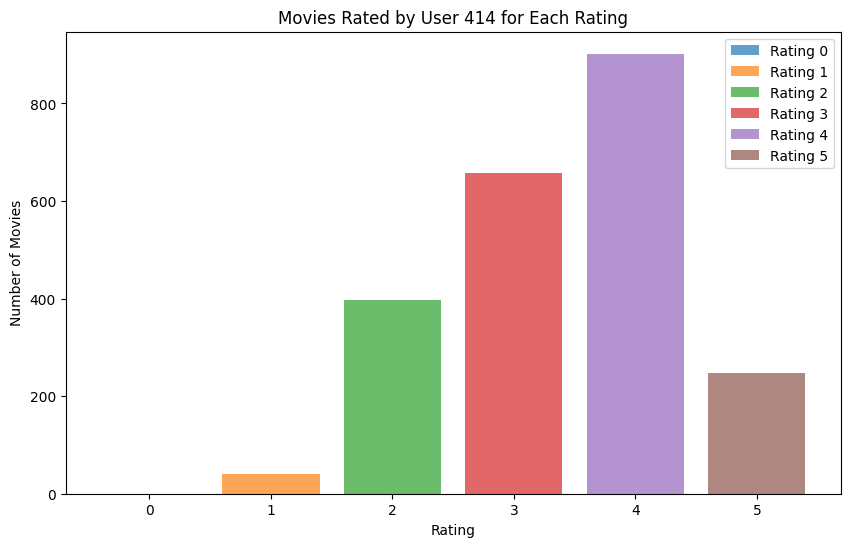

In [ ]:
# Filter data for the user with ID 414
user_414_movies = df[df['userId'] == 414]

# Create a dictionary to store movies for each rating
movies_by_rating = {}

# Loop through each rating and store movies with that rating in the dictionary
for rating in range(6):
    movies_by_rating[rating] = user_414_movies[user_414_movies['rating'] == rating]['title'].tolist()

# Plot a bar chart for movies rated by user 414 for each rating
plt.figure(figsize=(10, 6))
for rating, movies in movies_by_rating.items():
    plt.bar(str(rating), len(movies), label=f'Rating {rating}', alpha=0.7)

plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Movies Rated by User 414 for Each Rating')
plt.legend()
plt.show()

------ Number of movies released per year

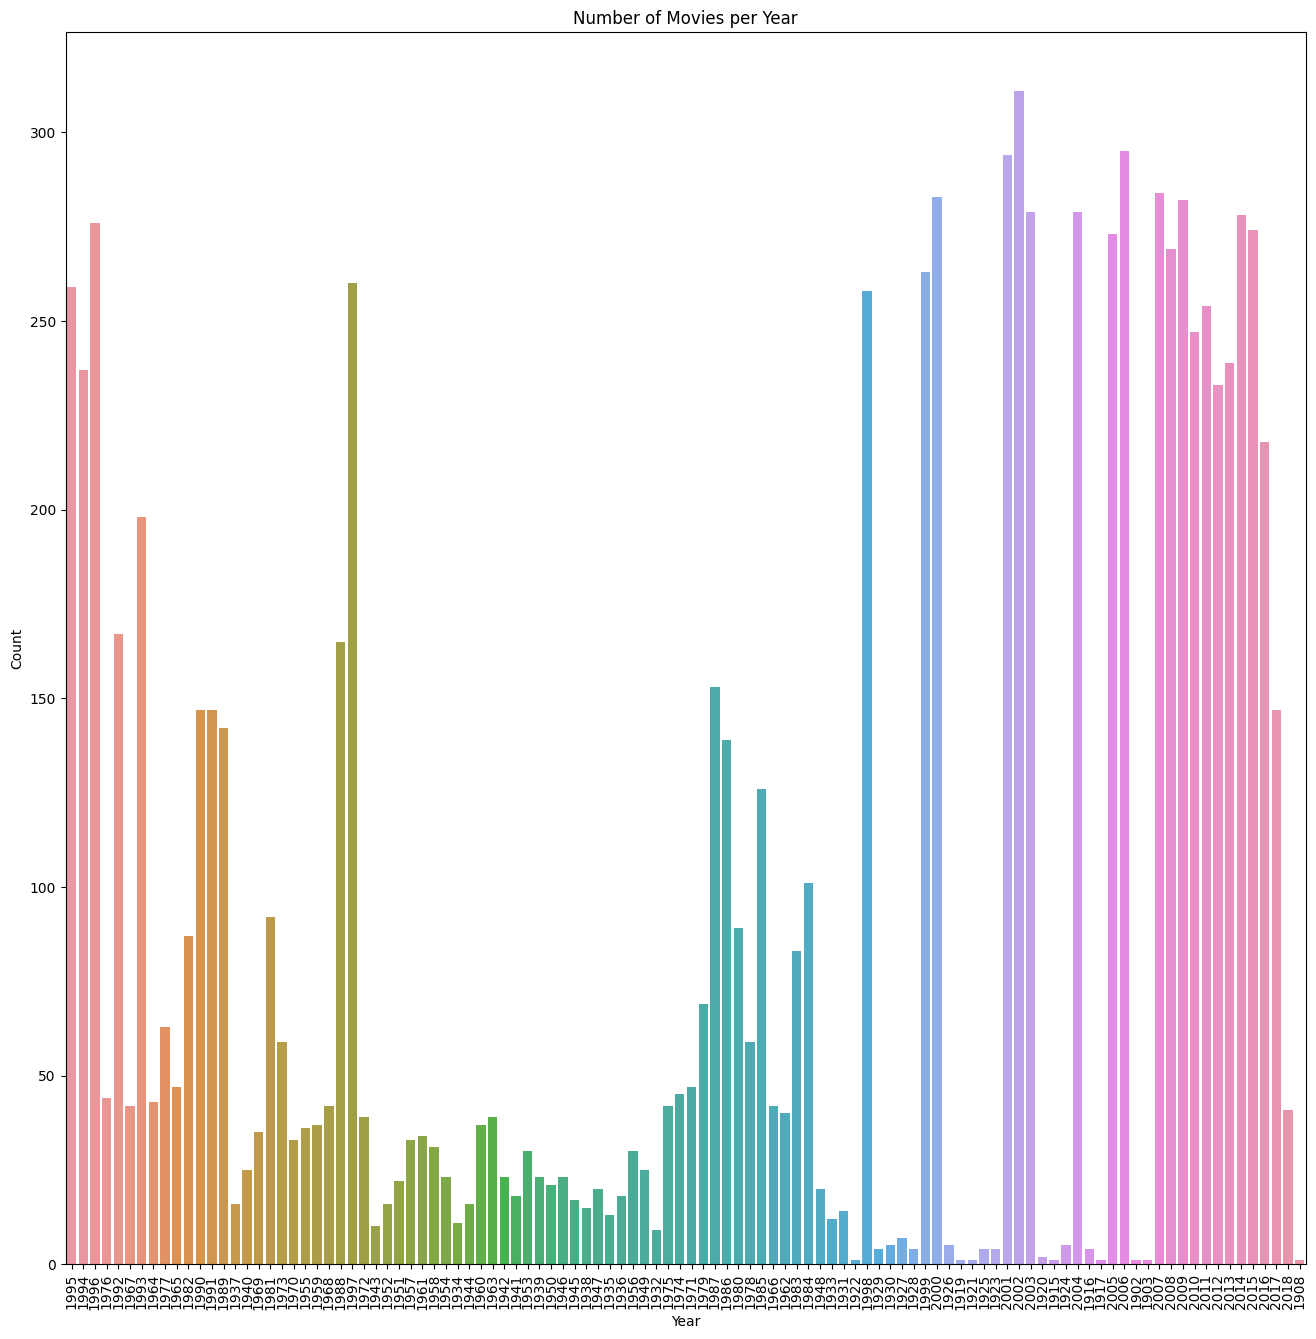

In [ ]:
# Set the figure size
plt.figure(figsize=(16, 16))

# Create a countplot for the number of movies per year
sns.countplot(data=movies_df, x='year')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Movies per Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

----- Getting total number of rating count 

In [ ]:
#( I WANT TO FIND OUT HOW MANY PERSONS HAVE RATED EACH AND EVERY MOVIE)

# Group the data by 'title' and count the number of ratings for each movie
rating_Count = df.groupby(by=['title'])['rating'].count()

# Reset the index of the resulting groupby object and rename the 'rating' column to 'totalRatingCount'
rating_Count = rating_Count.reset_index().rename(columns={'rating': 'total_Rating_Count'})

# Keep only the 'title' and 'totalRatingCount' columns in the DataFrame
rating_Count = rating_Count[['title', 'total_Rating_Count']]
rating_Count


,title,total_Rating_Count
0,'71,1
1,'Hellboy': The Seeds of Creation,1
2,'Round Midnight,2
3,'Salem's Lot,1
4,'Til There Was You,2
...,...,...
9428,eXistenZ,22
9429,xXx,24
9430,xXx: State of the Union,5
9431,¡Three Amigos!,26


### <i> Comments: This code segment is used to generate a DataFrame rating_Count that lists the movie titles along with the total count of ratings each movie has received.

----- Combine the 'combine_movie_rating' dataframe with the 'movie_ratingCount' dataframe based on the 'title' column

In [ ]:

# Using a left join to retain all records from 'combine_movie_rating' and append matching records from 'movie_ratingCount'
df_count = df.merge(rating_Count, on='title', how='left')

# Display the first few rows of the resulting dataframe
df_count.head()


,userId,movieId,rating,title,year,total_Rating_Count
0,1,1,4,Toy Story,1995,215
1,5,1,4,Toy Story,1995,215
2,7,1,4,Toy Story,1995,215
3,15,1,2,Toy Story,1995,215
4,17,1,4,Toy Story,1995,215


------- Descriptive statistics of the 'totalRatingCount'

In [ ]:
# Set the display format for float values
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Print the descriptive statistics of the 'totalRatingCount' column
print(rating_Count['total_Rating_Count'].describe())

count   9433.000
mean      10.688
std       22.827
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: total_Rating_Count, dtype: float64


----- plotting total rating count

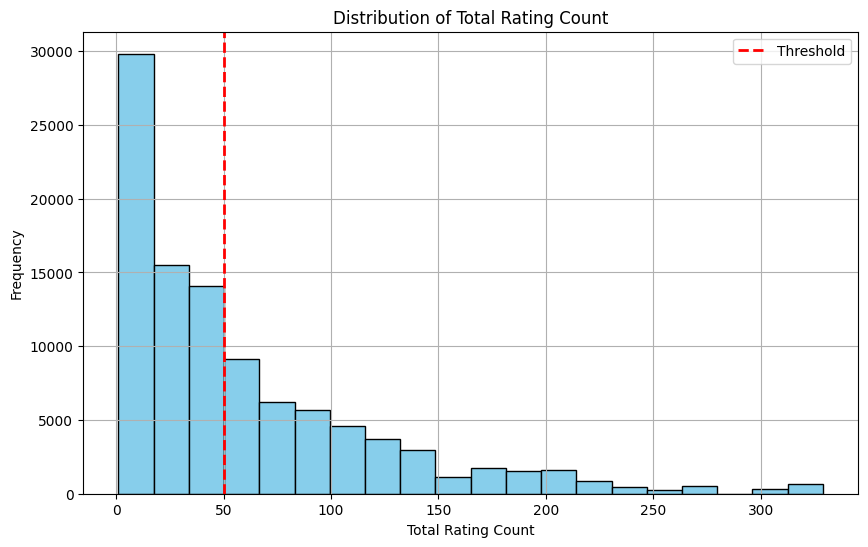

In [ ]:

# Plot a histogram of the 'totalRatingCount' column
plt.figure(figsize=(10, 6))
plt.hist(df_count['total_Rating_Count'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=50, color='red', linestyle='dashed', linewidth=2, label='Threshold')
plt.title('Distribution of Total Rating Count')
plt.xlabel('Total Rating Count')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Set the threshold for minimum total rating count
threshold = 50

# Use the query method to filter movies with total rating count greater than or equal to the threshold
rating_popular_movie = df_count.query('total_Rating_Count >= @threshold')

# Display the first few rows of the filtered DataFrame
rating_popular_movie.head()


,userId,movieId,rating,title,year,total_Rating_Count
0,1,1,4.000,Toy Story,1995,215
1,5,1,4.000,Toy Story,1995,215
2,7,1,4.500,Toy Story,1995,215
3,15,1,2.500,Toy Story,1995,215
4,17,1,4.500,Toy Story,1995,215


In [ ]:
rating_popular_movie.shape

(42026, 6)

----- Create a pivot matrix

In [ ]:
# Create a Pivot matrix
movie_features_df = rating_popular_movie.pivot_table(index='title', columns='userId', values='rating').fillna(0)

# Display the first few rows of the pivot matrix
movie_features_df.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


### <i> Comments: creating a pivot matrix serves as a foundational step in building recommendation systems by providing a structured representation of user-movie interactions that facilitates various analysis and recommendation technique

----- Setting up a nearest neighbours model using the K-Nearest Neighbors algorithm 

<img src=".\panda.png" alt="Image Description">

In [ ]:
# Import necessary libraries
from scipy.sparse import csr_matrix # converting into array matrix
from sklearn.neighbors import NearestNeighbors

# Convert the pivot matrix to a CSR sparse matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

# Create a NearestNeighbors model with cosine similarity and 'brute' algorithm
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')#This algorithm compares each point with every other point in the dataset.

# Fit the model using the movie features matrix
model_knn.fit(movie_features_df_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
movie_features_df_matrix

<457x607 sparse matrix of type '<class 'numpy.float32'>'
	with 41859 stored elements in Compressed Sparse Row format>

### <i> Here's why we are using CSR matrix representation:

Memory Efficiency: Collaborative filtering recommendation systems typically deal with large datasets where most of the values are zeros (sparse). A dense representation of such data would consume a significant amount of memory. CSR matrices store only non-zero elements and their corresponding indices, making them memory-efficient. <br>

Computational Efficiency: Sparse matrices can be processed more efficiently in various matrix operations, including matrix-vector multiplications, which are commonly used in recommendation algorithms. CSR format allows faster row slicing and efficient matrix-vector operations.<br>

Nearest Neighbors Computation: In the context of k-nearest neighbors (kNN) algorithms, such as the one used for collaborative filtering, computing cosine similarity between data points can be efficiently performed using sparse matrix operations.<br>

In [ ]:
movie_features_df.shape

(457, 607)

In [ ]:
# Choose a random index from the range of available movies
query_index = np.random.choice(movie_features_df.shape[0])
print("Chosen Movie Index:", query_index)


Chosen Movie Index: 422


In [ ]:
# Calculate the distances and indices of the nearest neighbors for the chosen movie
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)


### <i> Comments: Finding the distances and indices of the 6 nearest neighbors to the randomly chosen movie. These neighbors are identified based on their feature vectors' similarity using the cosine similarity metric.

In [ ]:
# Loop through the recommended movies and their distances
recommended_movies = []
for i in range(0, len(distances.flatten())):
    # Check if this is the first recommendation
    if i == 0:
        # Print a message indicating recommendations for a specific movie
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        # Print details of each recommendation
        print('{0}: {1}, with distance of {2}'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))



Recommendations for True Lies:

1: Batman, with distance of 0.30347394943237305
2: Fugitive, The, with distance of 0.3162696957588196
3: Speed, with distance of 0.32718002796173096
4: Stargate, with distance of 0.33925092220306396
5: Die Hard: With a Vengeance, with distance of 0.3417416214942932


### <i> Comments:  so basically taking the recommendations made by the k-nearest neighbors model and printing them out one by one, along with their movie titles and the similarity distances. This helps us see which movies are similar to the one we randomly chose and how similar they are in terms of their features.

In [ ]:
movie_features_df.index[indices.flatten()]

Index(['True Lies', 'Batman', 'Fugitive, The', 'Speed', 'Stargate',
       'Die Hard: With a Vengeance'],
      dtype='object', name='title')

### Evaluations

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# User's relevant movies for the chosen movie
user_preference = movie_features_df.index[query_index]

# Extracted recommended movies
recommended_movies = movie_features_df.index[indices.flatten()]

# Create a list of relevant movies based on the user's preference
relevant_movies = [user_preference]

# Calculate precision, recall, and F1-score
precision = len(set(recommended_movies).intersection(relevant_movies)) / len(recommended_movies)
recall = len(set(recommended_movies).intersection(relevant_movies)) / len(relevant_movies)
f1 = 2 * (precision * recall) / (precision + recall)


print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.16666666666666666
Recall: 1.0
F1-Score: 0.2857142857142857


Precision: 0.16666666666666666 indicates that out of the recommended movies, only about 17% were actually relevant to the user's preferences.

Recall: 1.0 indicates that all the relevant movies were captured by the recommendations. This means that all the movies the user would have liked were included in the recommendations.

F1-Score: 0.2857142857142857 is the harmonic mean of precision and recall. It's a balanced metric that considers both false positives and false negatives. In this case, it suggests a trade-off between precision and recall.

A higher precision indicates a higher quality of recommendations, while a higher recall indicates that the system is not missing any potentially relevant items. The F1-Score takes both metrics into account and can help you assess the overall balance between precision and recall.

The evaluation metrics indicate that the current Nearest Neighbors recommendation system is not effectively providing accurate and relevant movie recommendations

In [55]:
import tkinter as tk
from tkinter import Entry, Button, Label, Listbox, Scrollbar, Text
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

# Load your dataset (replace 'imdb_movies.csv' with your actual dataset)
data = pd.read_csv('imdb_movies.csv')

new_column_names = {
    "names": "movie_title",
    "score": "IMDB_score",
    "orig_lang":"language",
    "budget_x":"budget",
    "date_x":"Date"
}

# Rename the columns using the rename() function
data.rename(columns=new_column_names, inplace=True)

# Print the DataFrame to verify the changes
data

# Drop rows with missing values
data.dropna(inplace=True)

# Preprocess your data (example: lowercase the 'overview' column and remove punctuation)
data['overview'] = data['overview'].str.lower()
data['overview'] = data['overview'].str.replace('[^\w\s]', '')

# Create a sigmoid kernel for similarity
tfv = TfidfVectorizer(
    min_df=3,
    max_features=None,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 3),
    stop_words='english'
)
data['overview'] = data['overview'].fillna('')
tfv_matrix = tfv.fit_transform(data['overview'])
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

# Function for movie recommendation
def give_rec(title, sig=sig):
    # Get the index corresponding to movie_title
    idx = indices[title]

    # Get the pairwise similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Get the titles of the top similar movies
    top_similar_titles = data['movie_title'].iloc[movie_indices]

    return top_similar_titles

# Function to get movie details (replace with your actual details retrieval code)
def get_movie_details(movie_title):
    return f"Details for '{movie_title}':\n" \
           f"IMDB Score: 8.0\n" \
           f"Language: English\n" \
           f"Budget: $100 million\n" \
           f"Release Date: 01/01/2022\n"

# Create the main window
window = tk.Tk()
window.title("Movie Recommendation System")

# Label and Entry for user input
label = Label(window, text="Enter the title of a movie:")
label.pack()
entry = Entry(window)
entry.pack()

# Button to recommend movies
def recommend_movies():
    user_input_title = entry.get()  # Get the user input title
    recommended_movies = give_rec(user_input_title)  # Call your recommendation function

    # Clear previous recommendations and movie details
    listbox.delete(0, tk.END)
    movie_details.delete("1.0", tk.END)

    # Display recommended movies
    for movie in recommended_movies:
        listbox.insert(tk.END, movie)  # Insert recommended movies into the listbox

    # Display movie details for the first recommended movie (you can enhance this logic)
    if recommended_movies.any():
        first_movie_details = get_movie_details(recommended_movies.iloc[0])  # Replace with your function to get details
        movie_details.insert("1.0", first_movie_details)

recommend_button = Button(window, text="Recommend Movies", command=recommend_movies)
recommend_button.pack()

# Listbox to display recommended movies
listbox = Listbox(window, width=40, height=10)
listbox.pack()

# Scrollbar for the listbox
scrollbar = Scrollbar(window, orient=tk.VERTICAL)
scrollbar.pack()
listbox.config(yscrollcommand=scrollbar.set)
scrollbar.config(command=listbox.yview)

# Text widget to display movie details
movie_details = Text(window, width=40, height=10)
movie_details.pack()

# Create a mapping of indices to movie titles
indices = pd.Series(data.index, index=data['movie_title']).drop_duplicates()

# Start the GUI application
window.mainloop()

### Reference: 
[1] https://www.kaggle.com/code/fransgel/exploratory-data-analysis-imdb-movies <br>
[2] https://www.youtube.com/watch?v=i4a0Of22QRg <br>
[3] https://github.com/krishnaik06/Recommendation_complete_tutorial/blob/master/Content%20Based%20Recommendation%20Engines%20using%20Python.ipynb